# Visualización del conjunto de datos
[Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)
Datos de una campaña de marketing bancario. Predice si un cliente suscribirá un depósito a plazo fijo.

## Conjunto de datos

### Descripción

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
   The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Ficheros de datos

- <span style="color:green">bank.zip</span>
- <span style="color:green">bank-additional.zip</span>

### Descarga de los ficheros de datos

[Enlace](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip)

### Adicional Variable Información

Input variables:

#### bank client data:

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

#### related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

#### other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17. y has the client subscribed a term deposit? (binary: "yes","no")


## 1. Lectura del conjunto de datos


In [ ]:
%pip install pandas

In [91]:
# Lectura del conjunto de datos mediante funciones de Python
with open("./datasets/bank+marketing/bank/bank-full.csv") as train_set:
    df = train_set.readlines()
df

['"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"\n',
 '58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"\n',
 '44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"\n',
 '33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"\n',
 '47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"\n',
 '33;"unknown";"single";"unknown";"no";1;"no";"no";"unknown";5;"may";198;1;-1;0;"unknown";"no"\n',
 '35;"management";"married";"tertiary";"no";231;"yes";"no";"unknown";5;"may";139;1;-1;0;"unknown";"no"\n',
 '28;"management";"single";"tertiary";"no";447;"yes";"yes";"unknown";5;"may";217;1;-1;0;"unknown";"no"\n',
 '42;"entrepreneur";"divorced";"tertiary";"yes";2;"yes";"no";"unknown";5;"may";380;1;-1;0;"unknown";"

Cada línea tiene los valores de las características de entrada separadas por comas. Cada línea será un flujo.


In [92]:
# Lectura del conjunto de datos utilizando Pandas

import pandas as pd

df = pd.read_csv("./datasets/bank+marketing/bank/bank-full.csv", delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Pandas nos hace todo más amigable. Obtenemos, por una parte el número de ejemplos que tenemos y también el número de columnas (características y salida).
Este fichero no trae los nombres de las características de entrada. Al ser un fichero csv, la primera linea serán los nombres de los datos

## 2. Identificar características de entrada y salida

In [93]:
# Las cabeceras de las columnas son las siguientes:

print(df.columns)
print('Donde la clase seria la columna : ' + df.columns[-1])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype='object')
Donde la clase seria la columna : y


In [94]:
# Mostrar información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [95]:
# Mostrar los valores únicos que tiene un atributo determinado. Por ejemplo la educación de los clientes
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [96]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## 3. Crea una función que lea los ficheros y muestre formateado el Dataframe correspondiente con características y salida en Pandas.


Llegados a este punto lo ideal es construir una función que permita leer el conjunto de datos de manera más limpia. Este tipo de prácticas son de gran utilidad para que nuestro código en el Jupyter Notebook sea más modular y pueda reutilizarse de manera más sencilla para futuros ejercicios. Incluiremos la opción de indicar el delimitador del csv


In [116]:
import pandas as pd

def load_dataset(data_path, delimiter=';'):
  df = pd.read_csv(data_path, delimiter=delimiter)

  pd.set_option('display.max_columns', None)

  return df


In [117]:
df_orig = load_dataset("./datasets/bank+marketing/bank/bank-full.csv")
df = df_orig.copy()

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 4. Muestra gráficamente la distribución de los atributos

In [ ]:
%pip install matplotlib
%matplotlib inline

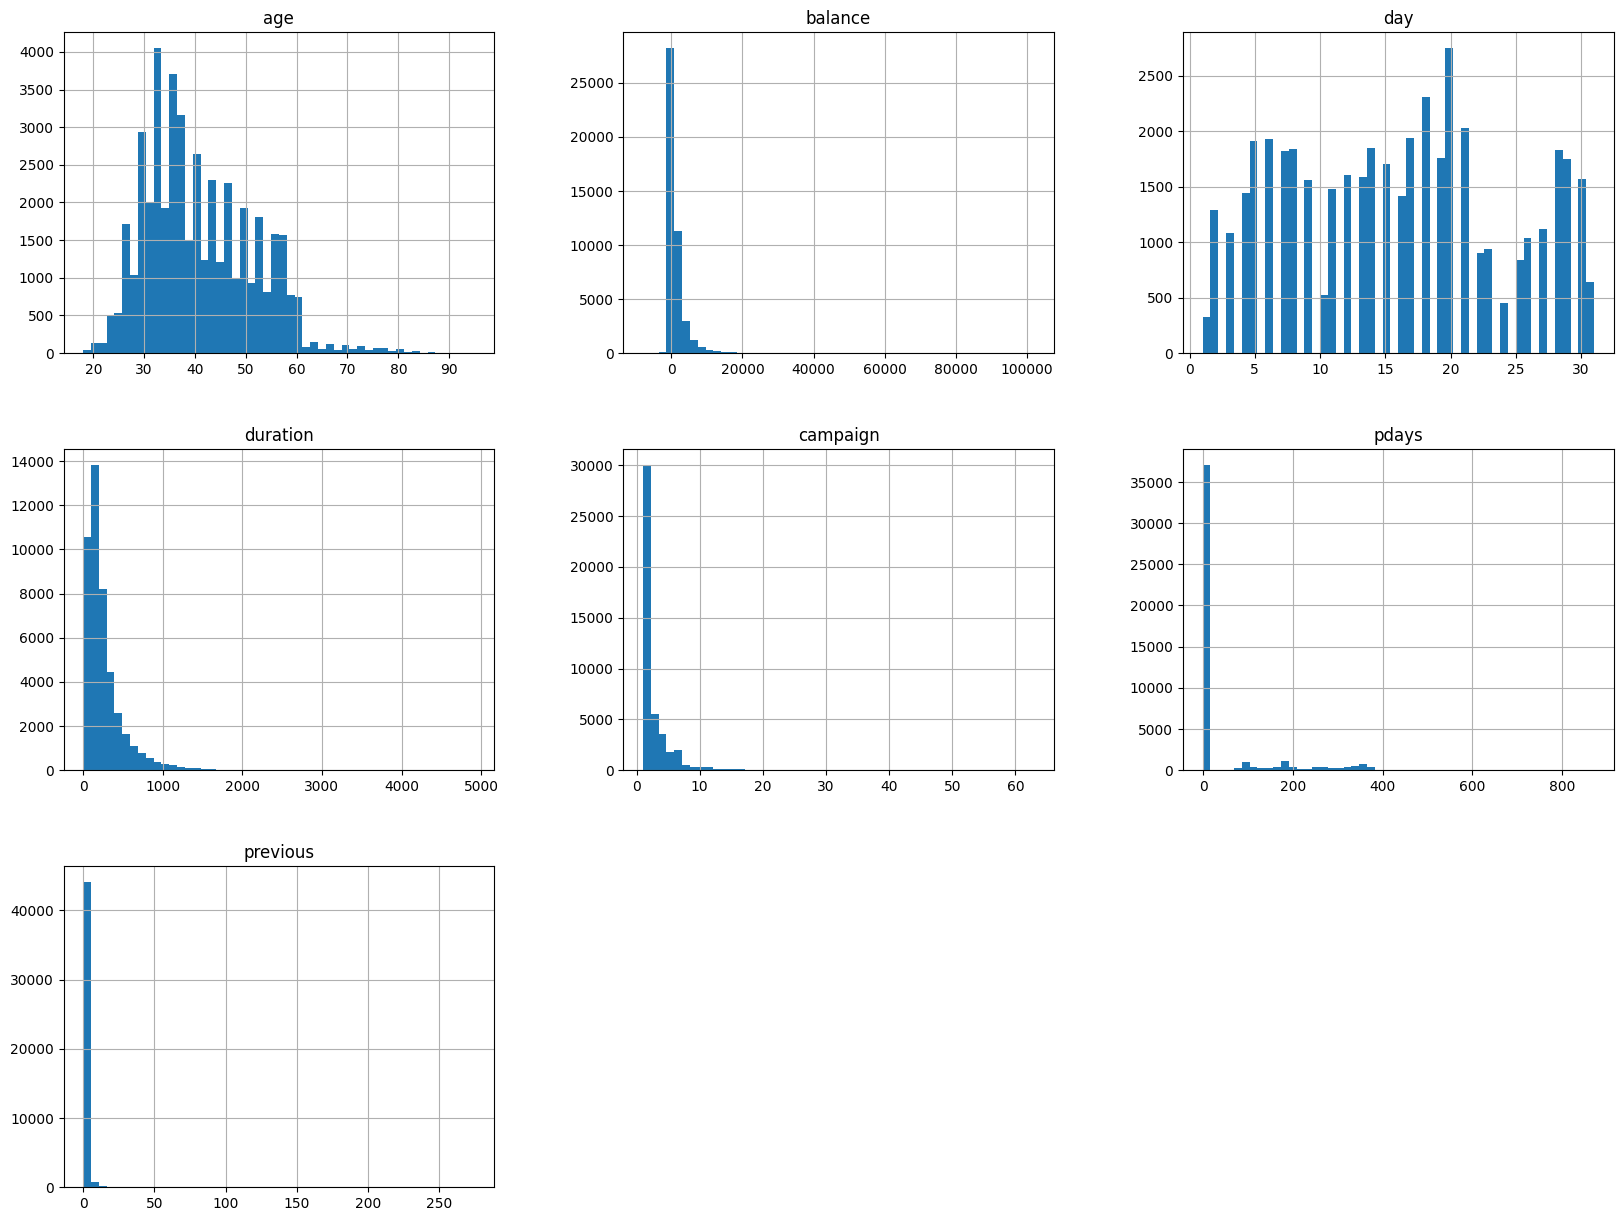

In [118]:
import matplotlib.pyplot as plt

# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

## 5. Muestra la tabla de correlación con la clase

**Tenemos que intentar buscar correlaciones sobre todo con el atributo objetivo (el que queremos predecir), en este caso y**


In [ ]:
%pip install scikit-learn

In [119]:
# El atributo y de nuestro conjunto de datos tiene valores categoricos
df["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [125]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convertimos el atributo 'y' a valores numéricos (1 para normal, 0 para anómala)
labelencoder = LabelEncoder()
df["y"] = labelencoder.fit_transform(df["y"])

# Convertimos los valores categóricos de las otras columnas a numéricos
categorical_columns = ["education", "marital", "job", "default", "housing", "loan", "contact", "month", "poutcome"]

for col in categorical_columns:
    df[col] = labelencoder.fit_transform(df[col])

print(df)

correlation_matrix = df.corr()  # Calculamos la matriz de correlación
correlation_with_y = correlation_matrix["y"]  # Obtenemos las correlaciones con la clase 'y'

# Mostramos la correlación con la clase
print("Correlación con la clase (y):")
print(correlation_with_y.sort_values(ascending=False))


       age  job  marital  education  default  balance  housing  loan  contact  day  month  duration  campaign  pdays  previous  poutcome  y
0      58    4      1         2         0      2143       1       0      2      5     8       261        1       -1       0         3     0
1      44    9      2         1         0        29       1       0      2      5     8       151        1       -1       0         3     0
2      33    2      1         1         0         2       1       1      2      5     8        76        1       -1       0         3     0
3      47    1      1         3         0      1506       1       0      2      5     8        92        1       -1       0         3     0
4      33   11      2         3         0         1       0       0      2      5     8       198        1       -1       0         3     0
...    ...  ...      ...        ...      ...      ...      ...   ...      ...  ...    ...       ...       ...    ...       ...       ... ..
45206  51    9      

## 6. Muestra la correlación lineal entre todos los atributos

Las características con más correlación serán más relevantes.

In [127]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
campaign,0.004760,0.006839,-0.008994,0.006255,0.016822,-0.014578,-0.023599,0.009980,0.019614,0.162490,-0.110031,-0.084570,1.000000,-0.088628,-0.032855,0.101588,-0.073172
pdays,-0.023758,-0.024455,0.019172,0.000052,-0.029979,0.003435,0.124178,-0.022754,-0.244816,-0.093044,0.033065,-0.001565,-0.088628,1.000000,0.454820,-0.858362,0.103621
previous,0.001288,-0.000911,0.014973,0.017570,-0.018329,0.016674,0.037076,-0.011043,-0.147811,-0.051710,0.022727,0.001203,-0.032855,0.454820,1.000000,-0.489752,0.093236
poutcome,0.007367,0.011010,-0.016850,-0.019361,0.034898,-0.020967,-0.099971,0.015458,0.272214,0.083460,-0.033038,0.010925,0.101588,-0.858362,-0.489752,1.000000,-0.077840


## 7. - Identifica que atributos son importantes y cuáles redundantes.

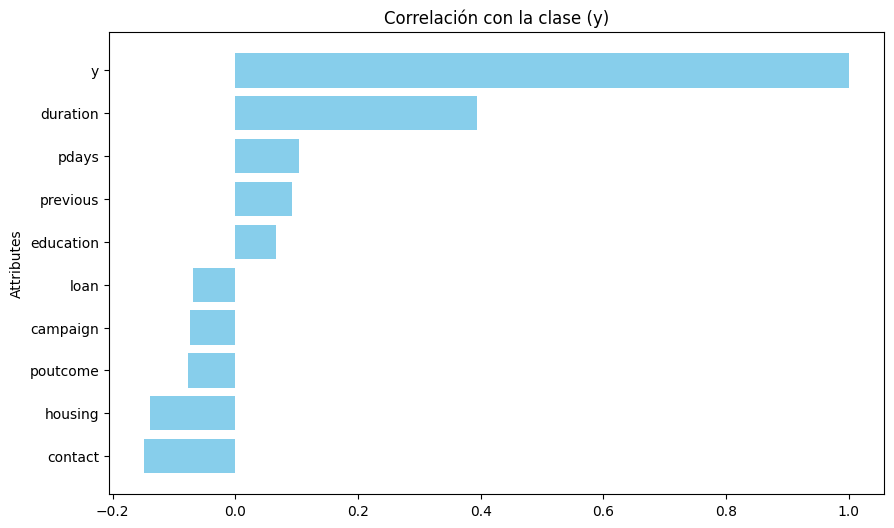

In [139]:
# Crear un DataFrame a partir de los datos de correlación
df_correlation = pd.DataFrame(correlation_data)
df_correlation = df_correlation.sort_values(by="Correlation_with_y", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_correlation["Attribute"], df_correlation["Correlation_with_y"], color="skyblue")
plt.ylabel("Attributes")
plt.title("Correlación con la clase (y)")
plt.gca().invert_yaxis()
plt.show()

Como podemos ver, **duration** es la que mas correlación tiene con y

## 8. Muestra gráficamente la matriz de correlación.

In [ ]:
%pip install seaborn

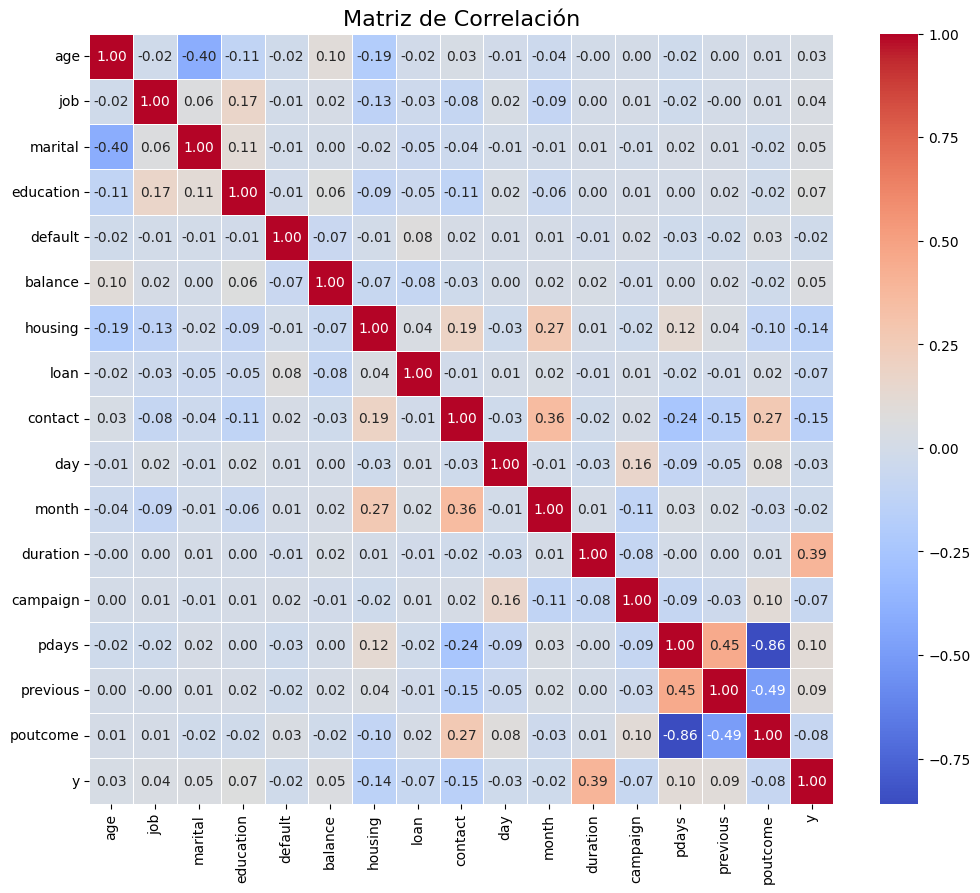

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
# Mejoramos la vistualización de la matriz de correlación
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor="white"
)
plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(fontsize=10)  # Tamaño del texto X
plt.yticks(fontsize=10)  # Tamaño del texto Y
plt.show()
